# Task 1

# Import the required python libraries.

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy as hc
from ipywidgets import interactive
import warnings
warnings.filterwarnings('ignore')

# Import the four datasets,namely cities,worldcities,movehubcostoflving, and movehubqualityoflife.

In [98]:
a=pd.read_csv("DS2_C6_S2_Cities_Data_Practice.csv")
b=pd.read_csv("DS2_C6_S2_WorldCities_Data_Practice.csv")
c=pd.read_csv("DS2_C6_S2_MoveHubCostOfLiving_Data_Practice.csv")
d=pd.read_csv("DS2_C6_S2_MoveHubQualityOfLife_Data_Practice.csv")

# Task 2

# 1.Preprocessing the data in the following way.

In [99]:
a.head()

,City,Country
0,Oakland,United States
1,Oakville,Canada
2,Oaxaca de Juárez,Mexico
3,Oberhausen,Germany
4,Obihiro,Japan


In [100]:
a.columns

Index(['City', 'Country'], dtype='object')

In [101]:
a.shape

(3543, 2)

In [102]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3543 entries, 0 to 3542
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   City     3543 non-null   object
 1   Country  3540 non-null   object
dtypes: object(2)
memory usage: 55.5+ KB


In [103]:
a.describe()

,City,Country
count,3543,3540
unique,3489,175
top,City,China
freq,24,435


In [104]:
a.isnull().sum()

City       0
Country    3
dtype: int64

In [105]:
a[a['Country'].isnull()]
a['Country']=a['Country'].fillna(a['Country'].mode()[0])

In [106]:
#Label_Encoder()
from sklearn.preprocessing import LabelEncoder
p=LabelEncoder()
a['City']=p.fit_transform(a['City'])
a['Country']=p.fit_transform(a['Country'])

In [107]:
b.head()

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37977000.0,1392685764
1,Jakarta,Jakarta,-6.2146,106.8451,Indonesia,ID,IDN,Jakarta,primary,34540000.0,1360771077
2,Delhi,Delhi,28.6600,77.2300,India,IN,IND,Delhi,admin,29617000.0,1356872604
3,Mumbai,Mumbai,18.9667,72.8333,India,IN,IND,Mahārāshtra,admin,23355000.0,1356226629
4,Manila,Manila,14.5958,120.9772,Philippines,PH,PHL,Manila,primary,23088000.0,1608618140


In [108]:
b.columns

Index(['city', 'city_ascii', 'lat', 'lng', 'country', 'iso2', 'iso3',
       'admin_name', 'capital', 'population', 'id'],
      dtype='object')

In [109]:
b.shape

(26569, 11)

In [110]:
b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26569 entries, 0 to 26568
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   city        26569 non-null  object 
 1   city_ascii  26569 non-null  object 
 2   lat         26569 non-null  float64
 3   lng         26569 non-null  float64
 4   country     26569 non-null  object 
 5   iso2        26538 non-null  object 
 6   iso3        26569 non-null  object 
 7   admin_name  26493 non-null  object 
 8   capital     7626 non-null   object 
 9   population  25596 non-null  float64
 10  id          26569 non-null  int64  
dtypes: float64(3), int64(1), object(7)
memory usage: 2.2+ MB


In [111]:
b.describe()

,lat,lng,population,id
count,26569.000000,26569.000000,2.559600e+04,2.656900e+04
mean,33.095264,-11.363860,1.623457e+05,1.556097e+09
std,22.393678,73.946817,8.996585e+05,2.873890e+08
min,-54.934100,-179.590000,0.000000e+00,1.004003e+09
25%,27.918300,-78.779400,9.246000e+03,1.276656e+09
50%,40.218800,-0.768900,2.007950e+04,1.643148e+09
75%,47.987800,29.683300,5.936925e+04,1.840005e+09
max,81.716600,179.366700,3.797700e+07,1.934000e+09


In [112]:
b.isnull().sum()

city              0
city_ascii        0
lat               0
lng               0
country           0
iso2             31
iso3              0
admin_name       76
capital       18943
population      973
id                0
dtype: int64

In [113]:
b[b['iso2'].isnull()]
b['iso2']=b['iso2'].fillna(b['iso2'].mode()[0])

b[b['admin_name'].isnull()]
b['admin_name']=b['admin_name'].fillna(b['admin_name'].mode()[0])

b[b['capital'].isnull()]
b['capital']=b['capital'].fillna(b['capital'].mode()[0])

b[b['population'].isnull()]
b['population']=b['population'].fillna(b['population'].mean())


In [114]:
#Label_Encoder()
b['city']=p.fit_transform(b['city'])
b['city_ascii']=p.fit_transform(b['city_ascii'])
b['country']=p.fit_transform(b['country'])
b['iso2']=p.fit_transform(b['iso2'])
b['iso3']=p.fit_transform(b['iso3'])
b['admin_name']=p.fit_transform(b['admin_name'])
b['capital']=p.fit_transform(b['capital'])

In [115]:
c.head()

,City,Cappuccino,Cinema,Wine,Gasoline,Avg Rent,Avg Disposable Income
0,Lausanne,3.15,12.59,8.40,1.32,1714.00,4266.11
1,Zurich,3.28,12.59,8.40,1.31,2378.61,4197.55
2,Geneva,2.80,12.94,10.49,1.28,2607.95,3917.72
3,Basel,3.50,11.89,7.35,1.25,1649.29,3847.76
4,Perth,2.87,11.43,10.08,0.97,2083.14,3358.55


In [116]:
c.columns

Index(['City', 'Cappuccino', 'Cinema', 'Wine', 'Gasoline', 'Avg Rent',
       'Avg Disposable Income'],
      dtype='object')

In [117]:
c.shape

(216, 7)

In [118]:
c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   City                   216 non-null    object 
 1   Cappuccino             216 non-null    float64
 2   Cinema                 216 non-null    float64
 3   Wine                   216 non-null    float64
 4   Gasoline               216 non-null    float64
 5   Avg Rent               216 non-null    float64
 6   Avg Disposable Income  216 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.9+ KB


In [119]:
c.describe()

,Cappuccino,Cinema,Wine,Gasoline,Avg Rent,Avg Disposable Income
count,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000
mean,1.981481,6.775602,7.079722,1.001898,1092.979213,1413.530463
std,0.737131,5.632751,3.325691,0.351713,664.778486,912.013027
min,0.460000,1.810000,2.130000,0.070000,120.680000,120.680000
25%,1.320000,4.397500,4.260000,0.735000,609.015000,549.860000
50%,2.085000,6.540000,6.540000,0.950000,980.650000,1535.415000
75%,2.490000,7.850000,8.472500,1.320000,1388.095000,2053.812500
max,4.480000,79.490000,26.150000,1.690000,5052.310000,4266.110000


In [120]:
c.isnull().sum()

City                     0
Cappuccino               0
Cinema                   0
Wine                     0
Gasoline                 0
Avg Rent                 0
Avg Disposable Income    0
dtype: int64

In [121]:
#Label_Encoder()
c['City']=p.fit_transform(c['City'])

In [122]:
d.head()

,City,Movehub Rating,Purchase Power,Health Care,Pollution,Quality of Life,Crime Rating
0,Caracas,65.18,11.25,44.44,83.45,8.61,85.70
1,Johannesburg,84.08,53.99,59.98,47.39,51.26,83.93
2,Fortaleza,80.17,52.28,45.46,66.32,36.68,78.65
3,Saint Louis,85.25,80.40,77.29,31.33,87.51,78.13
4,Mexico City,75.07,24.28,61.76,18.95,27.91,77.86


In [123]:
d.columns

Index(['City', 'Movehub Rating', 'Purchase Power', 'Health Care', 'Pollution',
       'Quality of Life', 'Crime Rating'],
      dtype='object')

In [124]:
d.shape

(216, 7)

In [125]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   City             216 non-null    object 
 1   Movehub Rating   216 non-null    float64
 2   Purchase Power   216 non-null    float64
 3   Health Care      216 non-null    float64
 4   Pollution        216 non-null    float64
 5   Quality of Life  216 non-null    float64
 6   Crime Rating     216 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.9+ KB


In [126]:
d.describe()

,Movehub Rating,Purchase Power,Health Care,Pollution,Quality of Life,Crime Rating
count,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000
mean,79.676713,46.477176,66.442824,45.240370,59.994537,41.338611
std,6.501011,20.614519,14.416412,25.369741,22.019376,16.416409
min,59.880000,6.380000,20.830000,0.000000,5.290000,9.110000
25%,75.070000,28.815000,59.420000,24.410000,42.752500,29.375000
50%,81.060000,49.220000,67.685000,37.210000,65.150000,41.140000
75%,84.020000,61.607500,77.207500,67.675000,78.617500,51.327500
max,100.000000,91.850000,95.960000,92.420000,97.910000,85.700000


In [127]:
d.isnull().sum()

City               0
Movehub Rating     0
Purchase Power     0
Health Care        0
Pollution          0
Quality of Life    0
Crime Rating       0
dtype: int64

In [128]:
#Label_Encoder()
d['City']=p.fit_transform(d['City'])

# a.Rename the 'city' feature of the worldcities dataset as 'City'.

In [129]:
b.rename(columns={'city':'City'},inplace=True)


# b.Sort the values of the 'population' feature of the worldcities dataset in descending order.

In [130]:
b.sort_values(by='population',ascending=False)


,City,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,20790,21052,35.6897,139.6922,100,101,102,3552,2,37977000.0,1392685764
1,9105,9221,-6.2146,106.8451,92,89,90,1426,2,34540000.0,1360771077
2,5024,5110,28.6600,77.2300,91,93,92,860,0,29617000.0,1356872604
3,13539,13703,18.9667,72.8333,91,93,92,2011,0,23355000.0,1356226629
4,12268,12408,14.5958,120.9772,158,158,157,2057,2,23088000.0,1608618140
...,...,...,...,...,...,...,...,...,...,...,...
26516,11643,11783,70.8504,153.9000,165,169,169,2985,1,0.0,1643050775
26503,1181,159,40.9053,45.5564,12,12,12,3492,1,0.0,1031834023
26566,3853,3945,51.3894,30.0989,209,204,207,1785,1,0.0,1804043438
26567,545,581,69.6510,162.3336,165,169,169,2985,1,0.0,1643739159


# c.Remove the duplicate values of the 'city' feature of the worldcities dataset by keeping the first value intact.

In [131]:
b.drop_duplicates(subset='City',keep='first',inplace=True)

# 2.Merge all the data into a single object.

In [132]:
x=pd.merge(a,b,on='City',how='inner')

In [133]:
y=pd.merge(c,d,on='City',how='inner')

In [134]:
df=pd.merge(x,y,on='City',how='inner')

In [135]:
df=df.drop(columns='country',axis=1)

In [136]:
df

,City,Country,city_ascii,lat,lng,iso2,iso3,admin_name,capital,population,...,Wine,Gasoline,Avg Rent,Avg Disposable Income,Movehub Rating,Purchase Power,Health Care,Pollution,Quality of Life,Crime Rating
0,202,2,229,30.3342,-9.4972,124,123,3220,1,171847.0,...,4.26,1.45,1193.48,1611.19,79.70,49.87,70.90,18.27,72.61,29.76
1,203,70,230,43.5263,5.4454,65,65,2767,1,142482.0,...,6.03,0.84,120.68,307.73,76.54,36.37,77.87,92.42,54.98,32.03
2,204,12,231,45.6885,5.9153,65,65,261,1,29794.0,...,4.26,1.24,596.74,1193.48,81.06,49.11,72.07,35.24,64.89,26.04
3,207,130,235,56.6008,25.2550,122,121,43,0,7745.0,...,3.41,1.40,1278.72,1875.46,78.82,45.69,72.67,11.48,70.34,21.48
4,205,124,232,5.7504,8.9833,39,37,3234,1,5798.0,...,12.75,0.89,1848.79,1657.53,82.59,48.06,83.73,18.48,71.89,30.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,196,166,223,-18.1667,-65.1667,24,25,769,1,7381.0,...,4.26,1.27,426.24,285.76,69.78,17.80,44.44,80.84,36.81,47.99
215,197,4,224,38.9942,-104.8639,206,209,776,1,6633.0,...,8.52,0.98,1967.31,2065.67,80.00,47.57,71.53,30.54,69.29,13.91
216,198,51,225,51.2917,-114.0144,31,32,113,1,61581.0,...,9.50,0.83,1593.78,1912.54,88.42,61.44,66.11,8.95,77.02,27.40
217,199,123,226,41.0992,-74.0990,206,209,2366,1,8786.0,...,4.26,1.28,1022.98,2011.86,82.10,54.47,81.01,36.23,66.66,47.27


# 3.Normalize all numeric features except 'lat','lng' and 'id'.

In [138]:
df1=df.drop(columns=['lat','lng','id'],axis=1)


In [142]:
#Feature_scaling
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
final_df=pd.DataFrame(scale.fit_transform(df1),columns=df1.columns)
final_df

,City,Country,city_ascii,iso2,iso3,admin_name,capital,population,Cappuccino,Cinema,Wine,Gasoline,Avg Rent,Avg Disposable Income,Movehub Rating,Purchase Power,Health Care,Pollution,Quality of Life,Crime Rating
0,1.513240,-1.727190,1.565813,0.176202,0.166858,1.175418,0.391671,-0.028818,0.204965,0.008076,-0.845543,1.282031,0.158600,0.222502,0.005451,0.160774,0.301967,-1.057862,0.575662,-0.710272
1,1.529314,-0.407065,1.579990,-0.764197,-0.757445,0.813692,0.391671,-0.071665,-1.719361,-0.824285,-0.310402,-0.466836,-1.466220,-1.214948,-0.482562,-0.491434,0.786475,1.864773,-0.222868,-0.572653
2,1.545388,-1.533054,1.594166,-0.764197,-0.757445,-1.187381,0.391671,-0.236091,-0.955090,0.008076,-0.845543,0.679962,-0.745199,-0.238147,0.215482,0.124057,0.383298,-0.388986,0.225993,-0.935796
3,1.593610,0.757751,1.650872,0.144324,0.134985,-1.361457,-1.926600,-0.268263,-0.955090,0.008076,-1.102531,1.138681,0.287701,0.513938,-0.130451,-0.041169,0.425006,-1.325490,0.472845,-1.212246
4,1.561462,0.641269,1.608342,-1.178610,-1.203660,1.186597,0.391671,-0.271104,0.778168,0.213928,1.721319,-0.323486,1.151106,0.273605,0.451767,0.073330,1.193824,-1.049584,0.543050,-0.693903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,1.416795,1.456640,1.480755,-1.417694,-1.394895,-0.781736,0.391671,-0.268794,-1.541941,-0.654233,-0.845543,0.765972,-1.003431,-1.239177,-1.526540,-1.388582,-1.537356,1.408345,-1.045857,0.394920
215,1.432869,-1.688363,1.494931,1.483197,1.537375,-0.776147,0.391671,-0.269886,0.436976,0.899507,0.442423,-0.065456,1.330612,0.723701,0.051781,0.049657,0.345761,-0.574237,0.425286,-1.671176
216,1.448944,-0.775923,1.509108,-1.306121,-1.283341,-1.305561,0.391671,-0.189710,0.341442,0.271209,0.738716,-0.495506,0.764878,0.554829,1.352120,0.719741,-0.031002,-1.425211,0.775408,-0.853346
217,1.465018,0.621856,1.523284,1.483197,1.537375,0.493488,0.391671,-0.266744,-0.081637,0.085046,-0.845543,0.794642,-0.099633,0.664359,0.376094,0.383008,1.004747,-0.349965,0.306164,0.351270


In [146]:
mm=df[['lat','lng','id']]
mm

,lat,lng,id
0,30.3342,-9.4972,1504134516
1,43.5263,5.4454,1250001687
2,45.6885,5.9153,1250456565
3,56.6008,25.2550,1428407271
4,5.7504,8.9833,1120658014
...,...,...,...
214,-18.1667,-65.1667,1068121487
215,38.9942,-104.8639,1840036508
216,51.2917,-114.0144,1124990202
217,41.0992,-74.0990,1840004991


In [151]:
final_df1=pd.concat([final_df,mm],axis=1)
final_df1

,City,Country,city_ascii,iso2,iso3,admin_name,capital,population,Cappuccino,Cinema,...,Avg Disposable Income,Movehub Rating,Purchase Power,Health Care,Pollution,Quality of Life,Crime Rating,lat,lng,id
0,1.513240,-1.727190,1.565813,0.176202,0.166858,1.175418,0.391671,-0.028818,0.204965,0.008076,...,0.222502,0.005451,0.160774,0.301967,-1.057862,0.575662,-0.710272,30.3342,-9.4972,1504134516
1,1.529314,-0.407065,1.579990,-0.764197,-0.757445,0.813692,0.391671,-0.071665,-1.719361,-0.824285,...,-1.214948,-0.482562,-0.491434,0.786475,1.864773,-0.222868,-0.572653,43.5263,5.4454,1250001687
2,1.545388,-1.533054,1.594166,-0.764197,-0.757445,-1.187381,0.391671,-0.236091,-0.955090,0.008076,...,-0.238147,0.215482,0.124057,0.383298,-0.388986,0.225993,-0.935796,45.6885,5.9153,1250456565
3,1.593610,0.757751,1.650872,0.144324,0.134985,-1.361457,-1.926600,-0.268263,-0.955090,0.008076,...,0.513938,-0.130451,-0.041169,0.425006,-1.325490,0.472845,-1.212246,56.6008,25.2550,1428407271
4,1.561462,0.641269,1.608342,-1.178610,-1.203660,1.186597,0.391671,-0.271104,0.778168,0.213928,...,0.273605,0.451767,0.073330,1.193824,-1.049584,0.543050,-0.693903,5.7504,8.9833,1120658014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,1.416795,1.456640,1.480755,-1.417694,-1.394895,-0.781736,0.391671,-0.268794,-1.541941,-0.654233,...,-1.239177,-1.526540,-1.388582,-1.537356,1.408345,-1.045857,0.394920,-18.1667,-65.1667,1068121487
215,1.432869,-1.688363,1.494931,1.483197,1.537375,-0.776147,0.391671,-0.269886,0.436976,0.899507,...,0.723701,0.051781,0.049657,0.345761,-0.574237,0.425286,-1.671176,38.9942,-104.8639,1840036508
216,1.448944,-0.775923,1.509108,-1.306121,-1.283341,-1.305561,0.391671,-0.189710,0.341442,0.271209,...,0.554829,1.352120,0.719741,-0.031002,-1.425211,0.775408,-0.853346,51.2917,-114.0144,1124990202
217,1.465018,0.621856,1.523284,1.483197,1.537375,0.493488,0.391671,-0.266744,-0.081637,0.085046,...,0.664359,0.376094,0.383008,1.004747,-0.349965,0.306164,0.351270,41.0992,-74.0990,1840004991


In [153]:
x=final_df1
x

,City,Country,city_ascii,iso2,iso3,admin_name,capital,population,Cappuccino,Cinema,...,Avg Disposable Income,Movehub Rating,Purchase Power,Health Care,Pollution,Quality of Life,Crime Rating,lat,lng,id
0,1.513240,-1.727190,1.565813,0.176202,0.166858,1.175418,0.391671,-0.028818,0.204965,0.008076,...,0.222502,0.005451,0.160774,0.301967,-1.057862,0.575662,-0.710272,30.3342,-9.4972,1504134516
1,1.529314,-0.407065,1.579990,-0.764197,-0.757445,0.813692,0.391671,-0.071665,-1.719361,-0.824285,...,-1.214948,-0.482562,-0.491434,0.786475,1.864773,-0.222868,-0.572653,43.5263,5.4454,1250001687
2,1.545388,-1.533054,1.594166,-0.764197,-0.757445,-1.187381,0.391671,-0.236091,-0.955090,0.008076,...,-0.238147,0.215482,0.124057,0.383298,-0.388986,0.225993,-0.935796,45.6885,5.9153,1250456565
3,1.593610,0.757751,1.650872,0.144324,0.134985,-1.361457,-1.926600,-0.268263,-0.955090,0.008076,...,0.513938,-0.130451,-0.041169,0.425006,-1.325490,0.472845,-1.212246,56.6008,25.2550,1428407271
4,1.561462,0.641269,1.608342,-1.178610,-1.203660,1.186597,0.391671,-0.271104,0.778168,0.213928,...,0.273605,0.451767,0.073330,1.193824,-1.049584,0.543050,-0.693903,5.7504,8.9833,1120658014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,1.416795,1.456640,1.480755,-1.417694,-1.394895,-0.781736,0.391671,-0.268794,-1.541941,-0.654233,...,-1.239177,-1.526540,-1.388582,-1.537356,1.408345,-1.045857,0.394920,-18.1667,-65.1667,1068121487
215,1.432869,-1.688363,1.494931,1.483197,1.537375,-0.776147,0.391671,-0.269886,0.436976,0.899507,...,0.723701,0.051781,0.049657,0.345761,-0.574237,0.425286,-1.671176,38.9942,-104.8639,1840036508
216,1.448944,-0.775923,1.509108,-1.306121,-1.283341,-1.305561,0.391671,-0.189710,0.341442,0.271209,...,0.554829,1.352120,0.719741,-0.031002,-1.425211,0.775408,-0.853346,51.2917,-114.0144,1124990202
217,1.465018,0.621856,1.523284,1.483197,1.537375,0.493488,0.391671,-0.266744,-0.081637,0.085046,...,0.664359,0.376094,0.383008,1.004747,-0.349965,0.306164,0.351270,41.0992,-74.0990,1840004991


In [162]:
x.columns

Index(['City', 'Country', 'city_ascii', 'iso2', 'iso3', 'admin_name',
       'capital', 'population', 'Cappuccino', 'Cinema', 'Wine', 'Gasoline',
       'Avg Rent', 'Avg Disposable Income', 'Movehub Rating', 'Purchase Power',
       'Health Care', 'Pollution', 'Quality of Life', 'Crime Rating', 'lat',
       'lng', 'id'],
      dtype='object')

# Task 3

# 1.Apply the AggAgglomerative hierarchical clustering algorithm to cluster data with two features.

In [165]:
x1=x.iloc[:,[12,15]]
x1

,Avg Rent,Purchase Power
0,0.158600,0.160774
1,-1.466220,-0.491434
2,-0.745199,0.124057
3,0.287701,-0.041169
4,1.151106,0.073330
...,...,...
214,-1.003431,-1.388582
215,1.330612,0.049657
216,0.764878,0.719741
217,-0.099633,0.383008


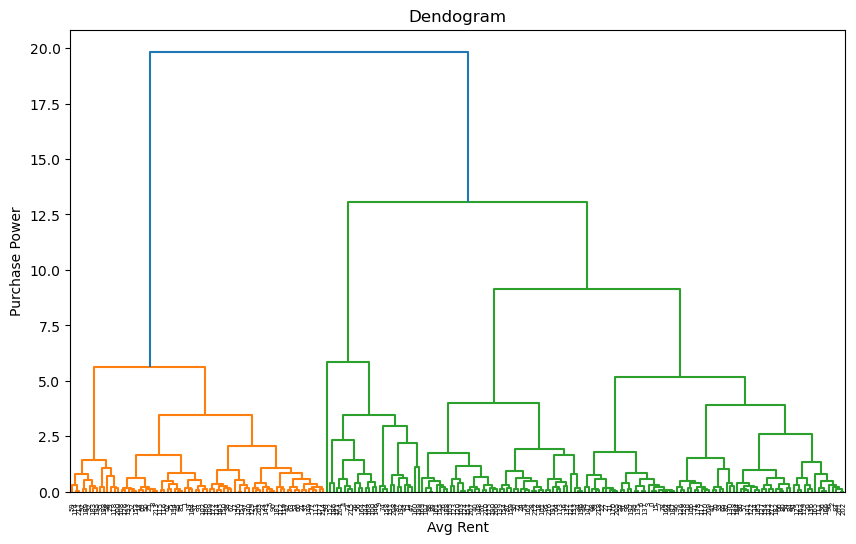

In [168]:
plt.figure(figsize=(10,6))
hc.dendrogram(hc.linkage(x1,method='ward'))
plt.title('Dendogram')
plt.xlabel('Avg Rent')
plt.ylabel('Purchase Power');

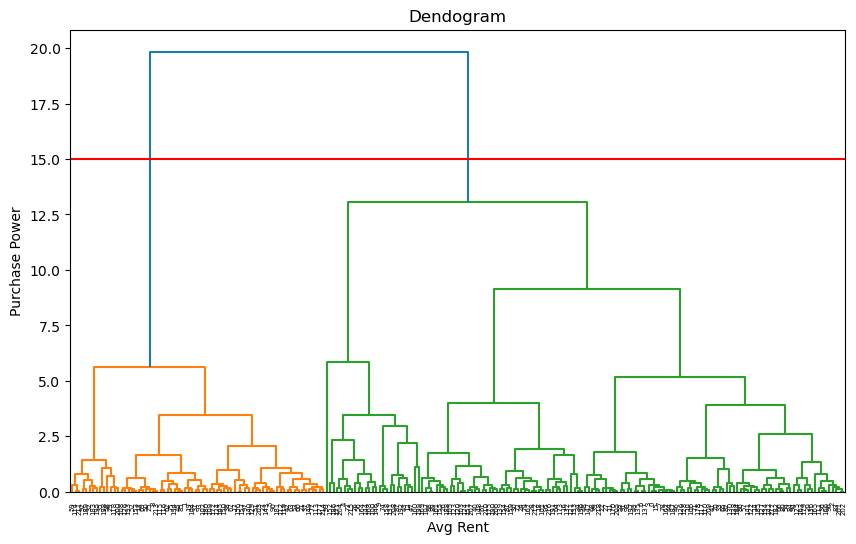

In [174]:
plt.figure(figsize=(10,6))
hc.dendrogram(hc.linkage(x1,method='ward'))
plt.axhline(y=15.0,color='r')
plt.title('Dendogram')
plt.xlabel('Avg Rent')
plt.ylabel('Purchase Power');

In [173]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
for k in range(2,9):
    AG=AgglomerativeClustering(n_clusters=k,affinity='euclidean',linkage='average')
    y_AG=AG.fit_predict(x1)
    print(k,silhouette_score(x1,y_AG))
    

2 0.7054520549135138
3 0.3816529965166483
4 0.4490470423328673
5 0.39802878084816845
6 0.40308901952087783
7 0.35196061337719026
8 0.3302302180770256


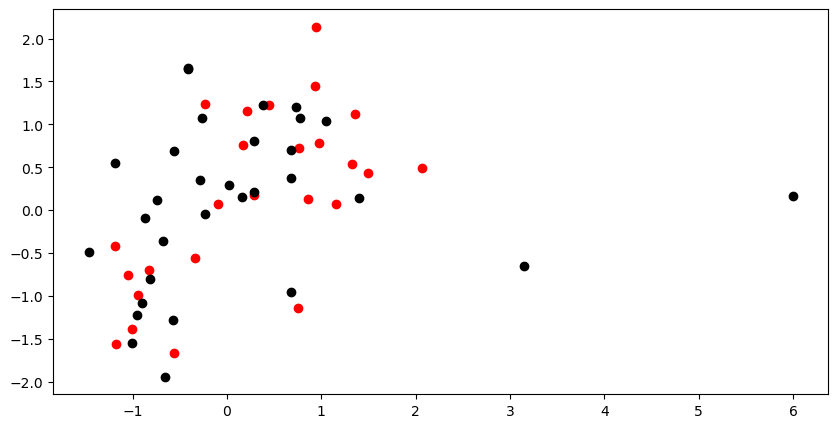

In [181]:
#x1=x1.to_numpy()
plt.figure(figsize=(10,5))
plt.scatter(x1[y_AG==0,0],x1[y_AG==0,1],c='r')
plt.scatter(x1[y_AG==1,0],x1[y_AG==1,1],c='k')

The Best silhouette_score of k=2.

# Task 4

# 1.Applying the Agglomerative hierarchical clustering algorithm to cluster the whole data.

In [176]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
for k in range(2,9):
    AG=AgglomerativeClustering(n_clusters=k,affinity='euclidean',linkage='ward')
    y_AG=AG.fit_predict(x)
    print(k,silhouette_score(x,y_AG))

2 0.6529020805688537
3 0.6025382783387223
4 0.659755052630776
5 0.6836260864617062
6 0.7336653486504476
7 0.7346079879001263
8 0.708392506231333


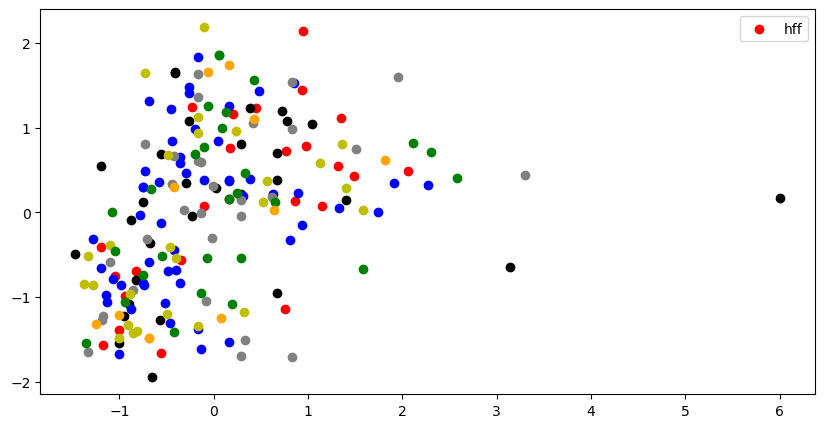

In [188]:
#x1=x1.to_numpy()
plt.figure(figsize=(10,5))
plt.scatter(x1[y_AG==0,0],x1[y_AG==0,1],c='r',label='hff')
plt.scatter(x1[y_AG==1,0],x1[y_AG==1,1],c='k')
plt.scatter(x1[y_AG==2,0],x1[y_AG==2,1],c='b')
plt.scatter(x1[y_AG==3,0],x1[y_AG==3,1],c='grey')
plt.scatter(x1[y_AG==4,0],x1[y_AG==4,1],c='y')
plt.scatter(x1[y_AG==5,0],x1[y_AG==5,1],c='g')
plt.scatter(x1[y_AG==6,0],x1[y_AG==6,1],c='orange')
plt.legend()

The Best silhouette_score of k=6.

# 2.Visualize possible paired feature clusters and data distribution.

In [195]:
def hierarchical(k=6,affinity='manhattan',linkage='complete',grid=False,column1=0,column2=1):
    y_AG=AgglomerativeClustering(n_clusters=k,affinity=affinity,linkage=linkage)
    y_AG=y_AG.fit_predict(x)
    colors = plt.cm.Spectral(np.linspace(0, 1,k))
    print('The Silhoutee Score is ',(silhouette_score(x,y_AG)))
    b=x.to_numpy()
    for i,c  in zip(np.unique(y_AG),colors):
        plt.scatter(b[y_AG==i,column1],b[y_AG==i,column2],color=c)
        plt.tight_layout()
    
    plt.grid(grid)
    plt.show()
import ipywidgets
ipywidgets.interact(hierarchical,k=(3,5,1),column1=(0,12,1),column2=(0,12,1),linkage=['ward','complete','single','average'],grid=False,affinity=['euclidean','l1','l2','manhattan','cosine','precomputed'])

interactive(children=(IntSlider(value=5, description='k', max=5, min=3), Dropdown(description='affinity', inde…

<function __main__.hierarchical(k=6, affinity='manhattan', linkage='complete', grid=False, column1=0, column2=1)>